In [1]:
#This is a self case study
print('\nIn India which stocks would go up or down is mostly estimated by the sentiment or emotion of the people.\nIt definately also depends upon the performance of the comapny but the emotions play a great role too.\nFor example if their is a news that says that a company is going to get bankrupt within few days,\npeople will panic and withraw their investments, resulting in drop in the stocks of that company.\n')


In India which stocks would go up or down is mostly estimated by the sentiment or emotion of the people.
It definately also depends upon the performance of the comapny but the emotions play a great role too.
For example if their is a news that says that a company is going to get bankrupt within few days,
people will panic and withraw their investments, resulting in drop in the stocks of that company.



In [2]:
print('\nThe data has been taken from kaggle.com from below link.\n\nhttps://www.kaggle.com/aaron7sun/stocknews?select=Combined_News_DJIA.csv.\n\nThe dataset used here contains 26 data columns and 1 target column or feature - Label.\nLabel column has two values - 0 and 1.\nLabel=0 indicates that either the stock decreased or remained same.\nLabel=1 indicates that the stock increased.\nThe 26 data columns include a date feature and top 25 news headlines for that company.\nThis is a supervised learning problem so we will break the dataset into train and test datasets.\nWe will use ML algorithms to solve this problem.\n')


The data has been taken from kaggle.com from below link.

https://www.kaggle.com/aaron7sun/stocknews?select=Combined_News_DJIA.csv.

The dataset used here contains 26 data columns and 1 target column or feature - Label.
Label column has two values - 0 and 1.
Label=0 indicates that either the stock decreased or remained same.
Label=1 indicates that the stock increased.
The 26 data columns include a date feature and top 25 news headlines for that company.
This is a supervised learning problem so we will break the dataset into train and test datasets.
We will use ML algorithms to solve this problem.



In [3]:
#First lets load the dataset.
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


#df = DataFrame
#because their are some special characters in the dataset, we can't use the default utf-8 encoding, so we use a slight variation for encoding- iso-8859-1.

df = pd.read_csv('Data.csv', encoding = "ISO-8859-1", header = 0, names = ['Date', 'Label', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'])    

df.head()        #first five datapoints.

,Date,Label,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [4]:
df.tail()      #last five datapoints

,Date,Label,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
4096,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
4097,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
4098,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
4099,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
4100,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in num

1    2166
0    1935
Name: Label, dtype: int64


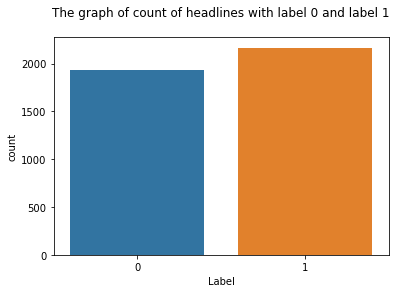

In [5]:
sns.countplot(x = 'Label', data = df)
plt.title('The graph of count of headlines with label 0 and label 1\n')
print(df['Label'].value_counts())

In [6]:
print('\nThe graph shows that the dataset is balanced.\nThis means that both the classes in the target variable have almost equal occurences\n')


The graph shows that the dataset is balanced.
This means that both the classes in the target variable have almost equal occurences



In [7]:
print('\nFirst we will train our ML model on the train dataset and then,\nbased on the top 25 news headlines we will predict if the stock will go up (1) or down (0)\nfor the test data and then see how well our model performs using a few metrics\n')


First we will train our ML model on the train dataset and then,
based on the top 25 news headlines we will predict if the stock will go up (1) or down (0)
for the test data and then see how well our model performs using a few metrics



In [8]:
print('\nBecause this dataset has a temporal nature, it is best to split it on the basis of time(or date).\nTemporal nature means that the data changes with time.\nFor example there might be a positive news for a company during june \nand a relatively negative news during december in the same year.\n')

train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']


Because this dataset has a temporal nature, it is best to split it on the basis of time(or date).
Temporal nature means that the data changes with time.
For example there might be a positive news for a company during june 
and a relatively negative news during december in the same year.



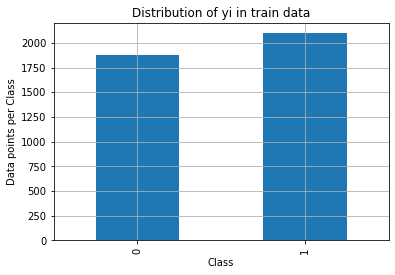

Number of data points in class 2 : 2096 ( 52.73 %)
Number of data points in class 1 : 1879 ( 47.27 %)
--------------------------------------------------------------------------------


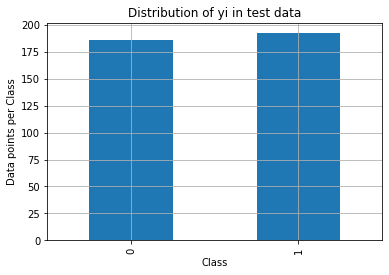

Number of data points in class 2 : 192 ( 50.794 %)
Number of data points in class 1 : 186 ( 49.206 %)
--------------------------------------------------------------------------------


In [9]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train['Label'].value_counts().sort_index()
test_class_distribution = test['Label'].value_counts().sort_index()

train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train['Label'].shape[0]*100), 3), '%)')

    
print('-'*80)
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test['Label'].shape[0]*100), 3), '%)')

print('-'*80)

In [10]:
print('\nWe will not remove stopwords because even the stopwords might have some meaning in the news headline.\nAnd even the accuracy achieved after we remove stopwords is lower.\n\nThe PorterStemmer was taking around 10-15 seconds more than the SnowballStemmer.\nBut I got better accuracy without stemming.\nAnd because I did not perform stemming, the time consumed decreased drastically.\n')


We will not remove stopwords because even the stopwords might have some meaning in the news headline.
And even the accuracy achieved after we remove stopwords is lower.

The PorterStemmer was taking around 10-15 seconds more than the SnowballStemmer.
But I got better accuracy without stemming.
And because I did not perform stemming, the time consumed decreased drastically.



In [24]:
#this function does a few preprocessing steps.

start = dt.datetime.now()

def preprocess(train):
    
    #we are taking only the news headline columns into the data variable, because we don't need the date and label for this task
    data = train.iloc[:,2:27]
    
    #we are relpacing all the characters accept the a-z with an empty string. 
    data.replace('[^a-zA-Z]',' ', regex = True, inplace = True)
    
    #converting each word into lower case.
    for index in range(25):
        data[str(index)] = data[str(index)].str.lower()
    
    #we are appending all the headlines (in one day) together into one big string.
    headlines = []
    for row in range(len(data.index)):
        headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))
        
    return headlines
    
Headlines = preprocess(train)

print("Time taken to run this cell :", dt.datetime.now() - start)
Headlines[0]

Time taken to run this cell : 0:00:01.939957


'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

vec = CountVectorizer(ngram_range = (2,2))
VEC = vec.fit_transform(Headlines)
# fit_transform() does two functions: First, it fits the model and learns the vocabulary; 
#second, it transforms our training data into feature vectors. The input to fit_transform should be a list of strings.

In [13]:
print('\nWhen I used ngram_range = (1,2) and ngram_range = (1,1) they gave a lower accuracy score \nthan what the ngram_range = (2,2) gave.\n\nTfidf vectorizer gave an accuracy score lower than the Countvectorizer.\n')


When I used ngram_range = (1,2) and ngram_range = (1,1) they gave a lower accuracy score 
than what the ngram_range = (2,2) gave.

Tfidf vectorizer gave an accuracy score lower than the Countvectorizer.



In [14]:
#open a file where you want to store the data.
vectorizer_file = open('vectorizer.pkl', 'wb')

#dump information to that file
pickle.dump(vec, vectorizer_file)

vectorizer_file.close()

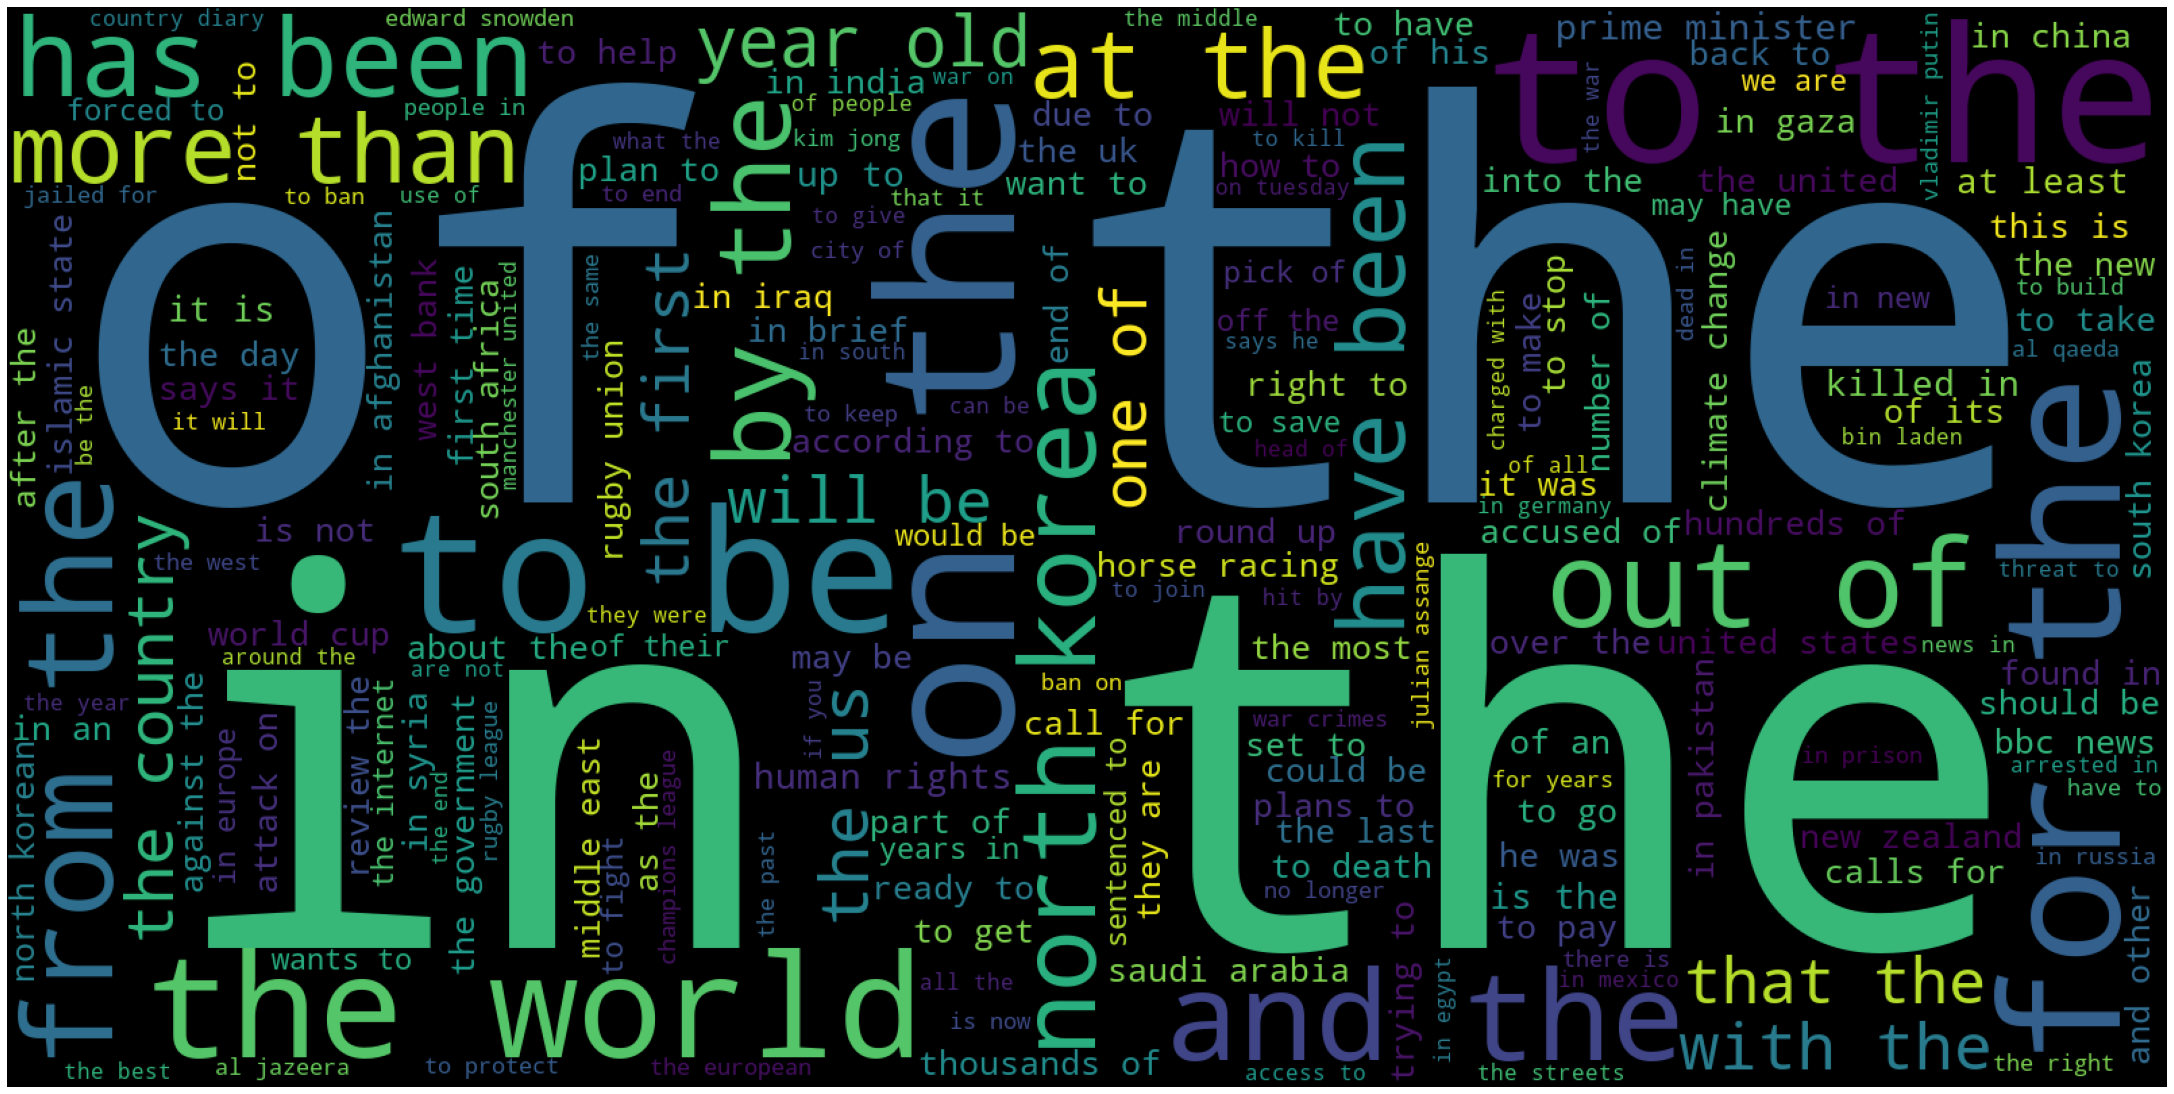

Time taken to run this cell : 0:00:11.277236

As is clearly visible from the wordcloud, the most frequent words are - to, the, and, in, of,....



In [15]:
#Plotting wordcloud.
from wordcloud import WordCloud

#'get_feature_name()' gives us the vocabulary.
f_name = vec.get_feature_names()

freqs = VEC.sum(axis=0).A1
result = dict(zip(f_name, freqs))

start = dt.datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())

#Initializing WordCloud using frequencies of words.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", dt.datetime.now() - start)
print('\nAs is clearly visible from the wordcloud, the most frequent words are - to, the, and, in, of,....\n')

In [16]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    #np.trace returns the sum along the diagonals of the array. So here we get the sum of true positives and true negatives.
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
        
    labels = [0, 1]
    cmap=sns.light_palette("green")
    # representing C in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing A in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))


					RANDOM MODEL


Accuracy on Test Data using Random Model 0.46825396825396826
Number of misclassified points  53.17460317460318
-------------------------------------------------- Confusion matrix --------------------------------------------------


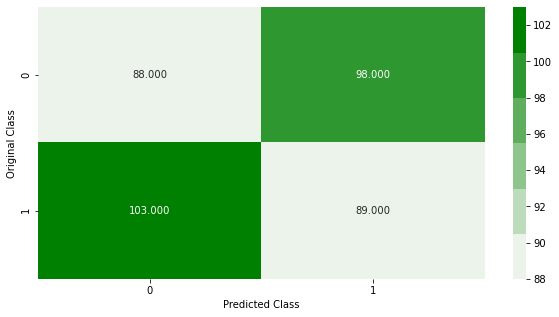

-------------------------------------------------- Precision matrix --------------------------------------------------


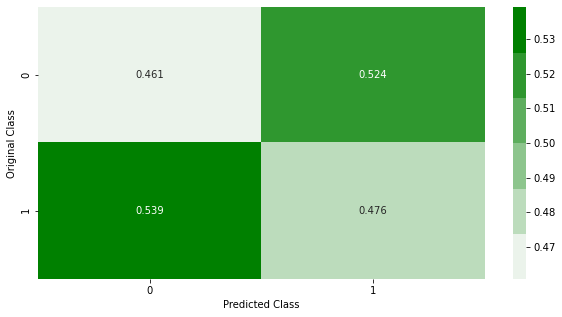

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


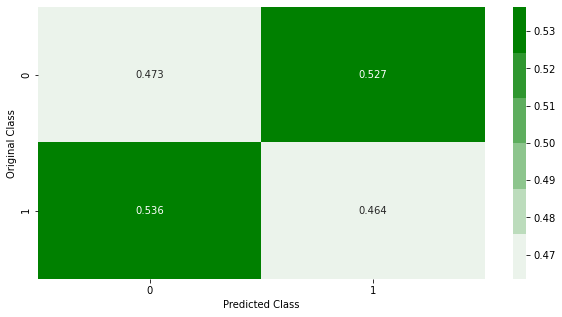

Sum of rows in precision matrix [1. 1.]


In [17]:
print('\n\t\t\t\t\tRANDOM MODEL\n\n')
test_data_len = test.shape[0]

# Test-Set error.
#we create an output array that has exactly same size as the test data
test_predicted_y = np.zeros((test_data_len,))
for i in range(test_data_len):
    test_predicted_y[i] = np.random.randint(2)
print("Accuracy on Test Data using Random Model",accuracy_score(test['Label'],test_predicted_y))

plot_confusion_matrix(test['Label'], test_predicted_y)

In [18]:
#naive bayes algorithm works great (generally) for textual data.
from sklearn.naive_bayes import MultinomialNB

nbclassifier = MultinomialNB()
nbclassifier.fit(VEC, train['Label'])

MultinomialNB()


					MULTINOMIAL NAIVE BAYES CLASSIFIER


Accuracy on Test Data using Multinomial Naive Bayes Model 0.8465608465608465
Number of misclassified points  15.343915343915343
-------------------------------------------------- Confusion matrix --------------------------------------------------


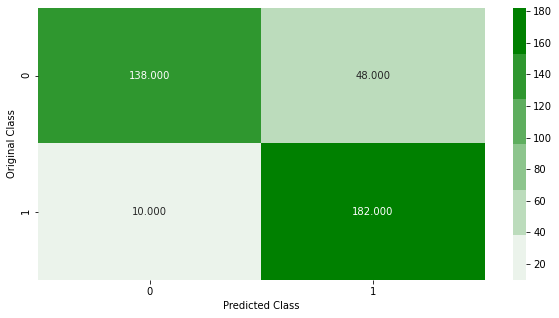

-------------------------------------------------- Precision matrix --------------------------------------------------


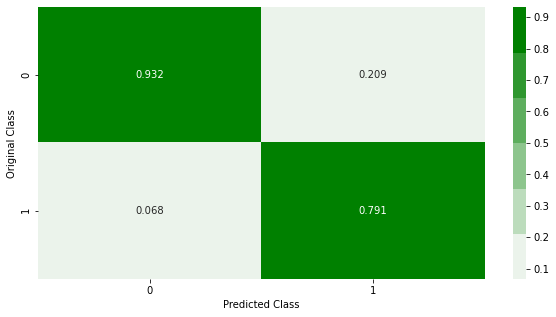

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


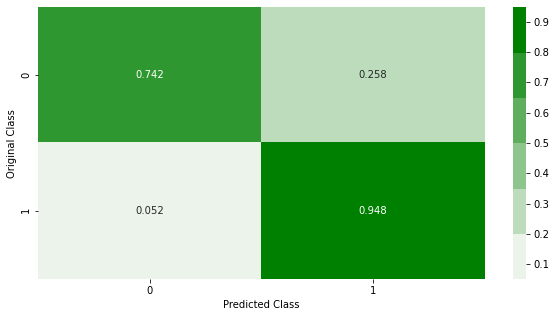

Sum of rows in precision matrix [1. 1.]


In [19]:
print('\n\t\t\t\t\tMULTINOMIAL NAIVE BAYES CLASSIFIER\n\n')

# Predict for the Test Dataset
test_transform= []
for row in range(len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = vec.transform(test_transform)
test_predictions = nbclassifier.predict(test_dataset)

print("Accuracy on Test Data using Multinomial Naive Bayes Model",accuracy_score(test['Label'], test_predictions))

plot_confusion_matrix(test['Label'], test_predictions)

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(VEC, train['Label'])

DecisionTreeClassifier(random_state=0)


					DECISION TREE CLASSIFIER


Accuracy on Test Data using Random Forest Model 0.8148148148148148
Number of misclassified points  18.51851851851852
-------------------------------------------------- Confusion matrix --------------------------------------------------


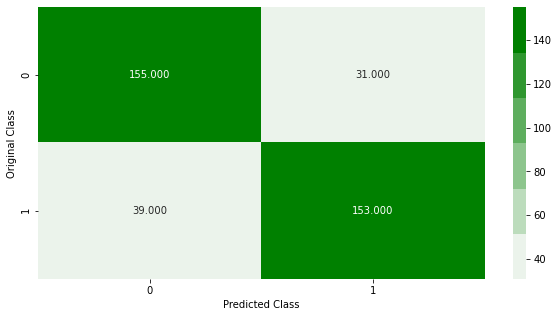

-------------------------------------------------- Precision matrix --------------------------------------------------


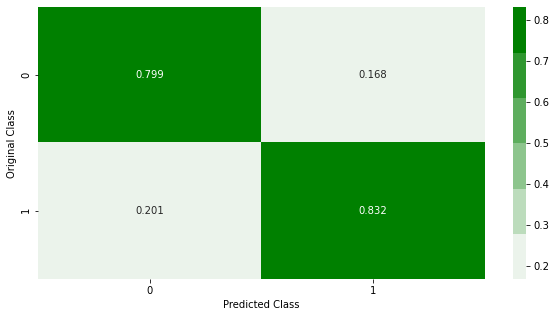

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


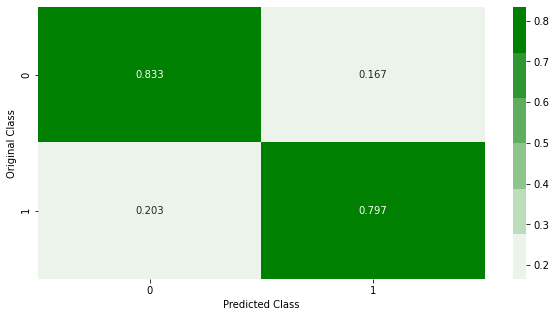

Sum of rows in precision matrix [1. 1.]


In [21]:
print('\n\t\t\t\t\tDECISION TREE CLASSIFIER\n\n')

# Predict for the Test Dataset
test_transform= []
for row in range(len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = vec.transform(test_transform)
test_predictions = dtc.predict(test_dataset)

print("Accuracy on Test Data using Random Forest Model",accuracy_score(test['Label'], test_predictions))

plot_confusion_matrix(test['Label'], test_predictions)

In [22]:
import xgboost as xgb

# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)
xgbclassifier = xgb.XGBClassifier(n_estimators=200, nthread=-1, use_label_encoder=False)
xgbclassifier.fit(VEC, train['Label'])

[20:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


					XG BOOST CLASSIFIER


Accuracy on Test Data using XGBoost Classifier Model 0.8333333333333334
Number of misclassified points  16.666666666666664
-------------------------------------------------- Confusion matrix --------------------------------------------------


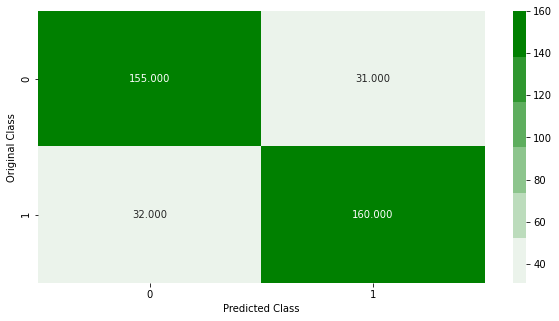

-------------------------------------------------- Precision matrix --------------------------------------------------


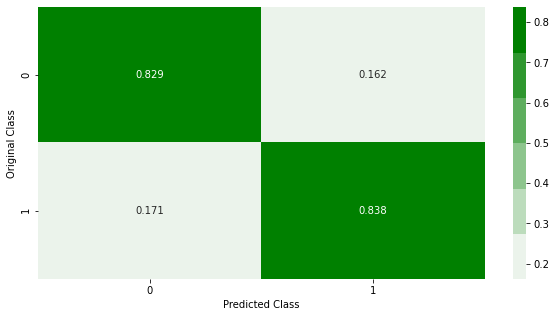

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


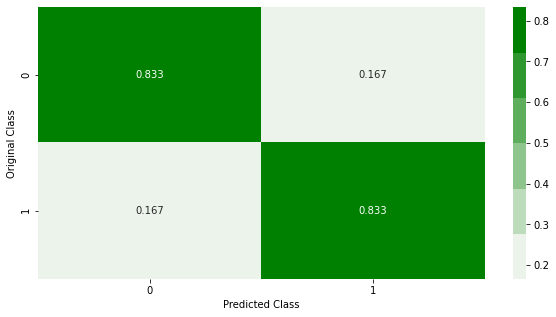

Sum of rows in precision matrix [1. 1.]


In [23]:
print('\n\t\t\t\t\tXG BOOST CLASSIFIER\n\n')

# Predict for the Test Dataset
test_transform = []
for row in range(len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row, 2:27]))
test_dataset = vec.transform(test_transform)
test_predictions = xgbclassifier.predict(test_dataset)

print("Accuracy on Test Data using XGBoost Classifier Model",accuracy_score(test['Label'], test_predictions))

plot_confusion_matrix(test['Label'], test_predictions)

In [24]:
# Implement RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

randomclassifier = RandomForestClassifier(n_estimators=200,random_state=42,n_jobs=-1)
randomclassifier.fit(VEC,train['Label'])

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)


					RANDOM FOREST CLASSIFIER


Accuracy on Test Data using Random Forest Model 0.8518518518518519
Number of misclassified points  14.814814814814813
-------------------------------------------------- Confusion matrix --------------------------------------------------


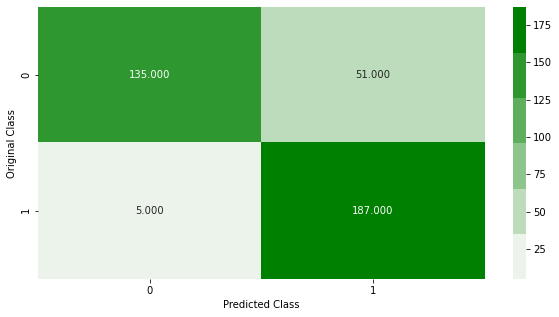

-------------------------------------------------- Precision matrix --------------------------------------------------


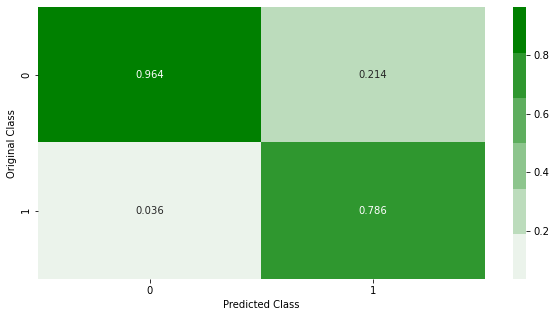

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


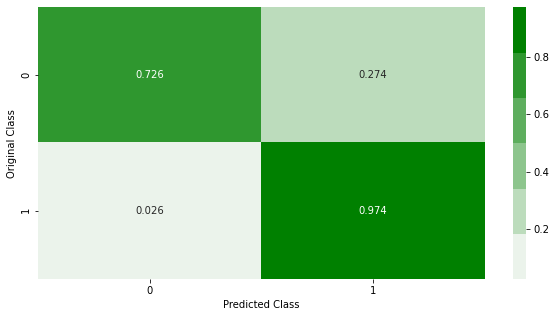

Sum of rows in precision matrix [1. 1.]


In [25]:
print('\n\t\t\t\t\tRANDOM FOREST CLASSIFIER\n\n')

# Predict for the Test Dataset
test_transform= []
for row in range(len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = vec.transform(test_transform)
test_predictions = randomclassifier.predict(test_dataset)

print("Accuracy on Test Data using Random Forest Model",accuracy_score(test['Label'], test_predictions))

plot_confusion_matrix(test['Label'], test_predictions)

In [26]:
print('\nRandom Forest Classifier gives the best accuracy = 85.2 %\n')


Random Forest Classifier gives the best accuracy = 85.2 %



<AxesSubplot:xlabel='Label', ylabel='Count'>

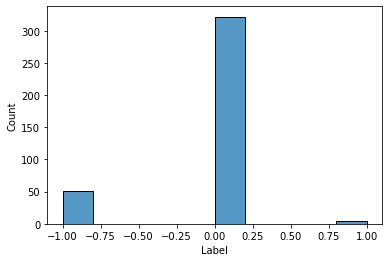

In [27]:
sns.histplot(test['Label'] - test_predictions)

In [28]:
print('\nMost of the points are classified correctly and above histogram is an example of that.\n')


Most of the points are classified correctly and above histogram is an example of that.



In [29]:
import pickle 

#open a file where you want to store the data.
model_file = open('model.pkl', 'wb')

#dump information to that file
pickle.dump(randomclassifier, model_file)

model_file.close()